<a href="https://colab.research.google.com/github/Deven876/project-2-NYC-Taxi-Trip-Time-Prediction/blob/main/project_2_Taxi_Trip_Time_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

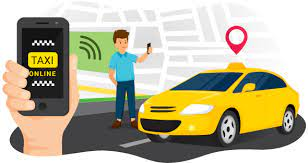
# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Architecture

Data Preparation and Exploratory Data Analysis > Build Predictive Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing 

In [1]:
# importing required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')


In [2]:
# importing dataset and reading 
file='/content/drive/MyDrive/taxi trip time prediction/NYC Taxi Data.csv'
data=pd.read_csv(file)
data1=data.copy() # making a copy 

# Data Inspection


In [3]:
# First look 
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
# looking into shape of dataset
data1.shape
print('number of rows',data1.shape[0])
print('number of columns',data1.shape[1])

number of rows 1458644
number of columns 11


In [5]:
# # looking into information(datatype,columns,null/non-null count)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
# looking in descriptive summary of dataset
data1.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Handling missing values  

In [7]:
# looking for missing values in dataset 
data1.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### ohh! thats great no missing values/Null values to deal with, lets say its blessing in disguise

## looking for unique values

In [8]:
# Let us check for unique values in columns.

print(data1.nunique().sort_values())

vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64


There are 2 unique vendor ids.

There are 10 unique passenger counts.

There are 2 unique values in store_and_fwd_flag, that we also saw in the description of the variables, i.e Y and N.

Text(0.5, 1.0, 'Descriptive Stats')

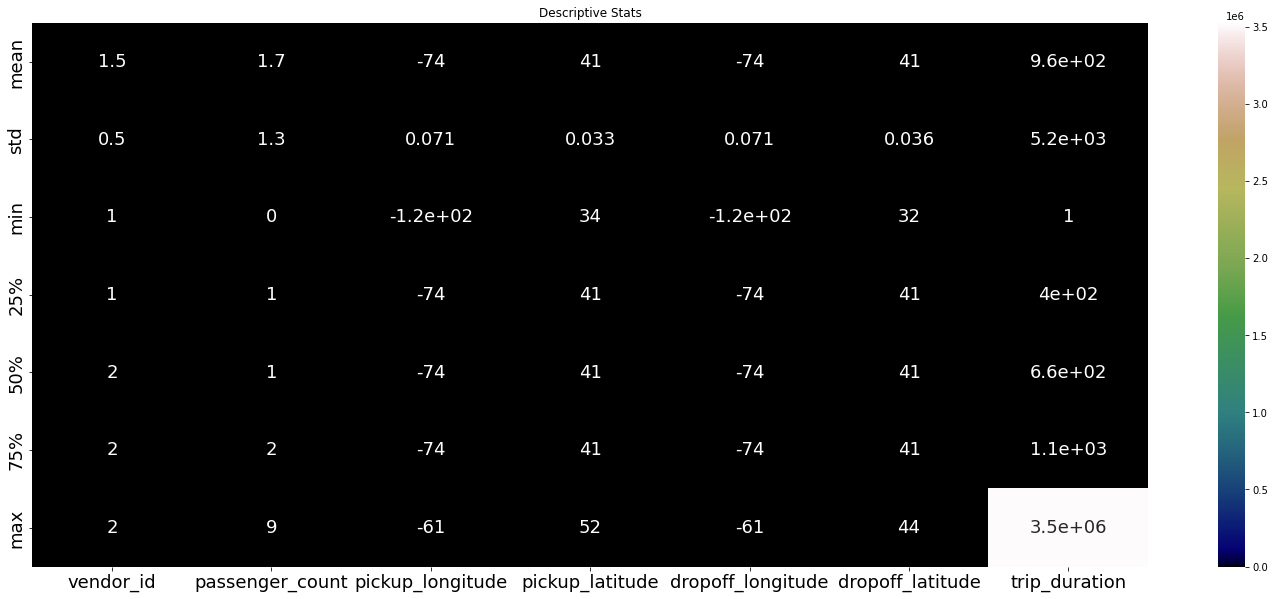

In [9]:
#Descriptive Stats in visual form

plt.figure(figsize=(25,10))
svm = sns.heatmap(data1.describe()[1:], annot=True, cmap='gist_earth',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)

plt.title('Descriptive Stats')

- We can observe that there were trips having 0 passengers which we can consider as false trip.


- Also, there are trips having trip duration upto 3526282 seconds (Approx. 980 hours) which is kind of impossible in a day.

# Feature Creation and Engineering
- Let us create some new features from the existing so that we can gain more insights from the data.

 - pickup_datetime and dropoff_datetime were both of type object.
 we can convert it to datetime object which contains numerous functions with which we can create new features.

In [10]:
# convert object type to datetime 
data1['pickup_datetime']=pd.to_datetime(data1['pickup_datetime']) 
data1['dropoff_datetime']=pd.to_datetime(data1['dropoff_datetime'])

- Now that we have converted object type to datetime64 we can extract and create new features from this datetime feature

In [11]:
# extracting further information from datetime feature
data1['pickup_day']=data1['pickup_datetime'].dt.day
data1['pickup_month']=data1['pickup_datetime'].dt.month
data1['pickup_weekday']=data1['pickup_datetime'].dt.weekday
data1['pickup_hour']=data1['pickup_datetime'].dt.hour
data1['pickup_date']=data1['pickup_datetime'].dt.date
data1['pickup_min']=data1['pickup_datetime'].dt.minute

- We do not have to extract pickup and dropoff time both, as they may lead to strong positive correlation between them.

In [12]:
# we will need to import library to calculate distances given in geographical coordinates
from geopy.distance import great_circle


- lets define a function to take coordinates as inputs and return distance

In [13]:
#distance_calc is a function to calculate distance between pickup and dropoff coordinates.
def distance_calc(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
 
  return great_circle(start_coordinates,stop_coordinates).km


- lets apply above function on given datset and create new feature as distance to define it 

In [14]:
data1['distance']=data1.apply(lambda x: distance_calc(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [15]:
# lets take a look at dataset set to check whether features creation and engineering got reflected in our dataset
data1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_date,pickup_min,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,0,17,2016-03-14,24,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,6,0,2016-06-12,43,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,1,11,2016-01-19,35,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,2,19,2016-04-06,32,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,3,5,13,2016-03-26,30,1.188590


In [16]:
# lets check dtypes before jumping into eda and preprocessing
data1.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


# Eda and Data Preprocessing

## univariate Analysis 

 A) **Vendor Id**

Text(0.5, 1.0, 'vendor_ids')

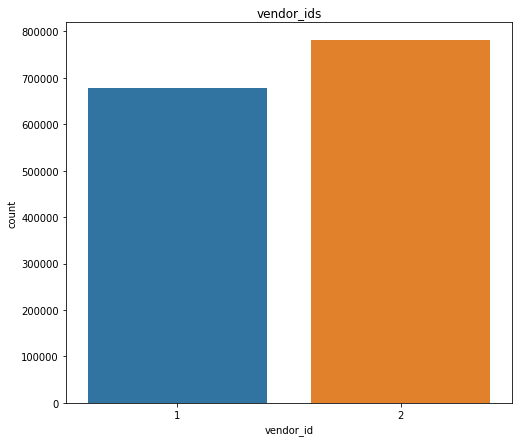

In [17]:
# vendor id visualization
plt.figure(figsize=(8,7))
sns.countplot(data1['vendor_id'])
plt.title('vendor_ids')


- From Above Visualization, we can say that there are **2 vendors**.


- 2nd Service provider is the most preferred one by New Yorkers.

B) **Store and forward flag**

Text(0.5, 1.0, 'Store and Forward Flag')

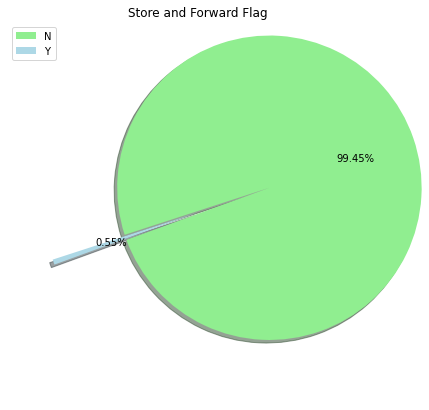

In [18]:
#Store & Forward flag visualization

plt.figure(figsize=(8,7))
plt.pie(data1['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightblue'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['N','Y'])
plt.title("Store and Forward Flag")

In [19]:
data1['store_and_fwd_flag'].value_counts() # to get exact count of stored trips

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

- We see there are less than 1% of trips that were stored before forwarding.

- The number of N flag is much larger than Y flag.



c) **Target Variable -Trip Duration**

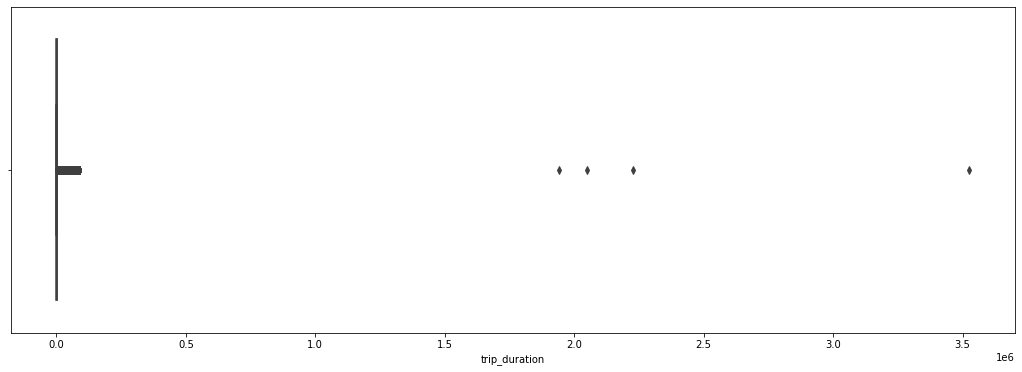

In [20]:
# visulaization of Trip Duration 
plt.figure(figsize=(18,6))
sns.boxplot(data1['trip_duration'])

In [21]:
# lets see otliers which are affecting the plot
data1['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1034341          1
346102           1
1360664          1
1382872          1
207497           1
Name: trip_duration, Length: 1458644, dtype: int64

- Probably in this visualization we can clearly see some outliers , their trips are lasting between 1900000 seconds (528 Hours) to 3500000 (972 hours) seconds which is impossible in case of taxi trips , How can a taxi trip be that long ?


- We’ll have to get rid of those Outliers.
- there are four rows only so lets drop them.

In [22]:
# dropping those outliers 
data1.drop(data1[data1['trip_duration']== 3526282].index,inplace=True)
data1.drop(data1[data1['trip_duration'] == 2227612].index, inplace = True)
data1.drop(data1[data1['trip_duration'] == 2049578].index, inplace = True)
data1.drop(data1[data1['trip_duration'] == 1939736].index, inplace = True)


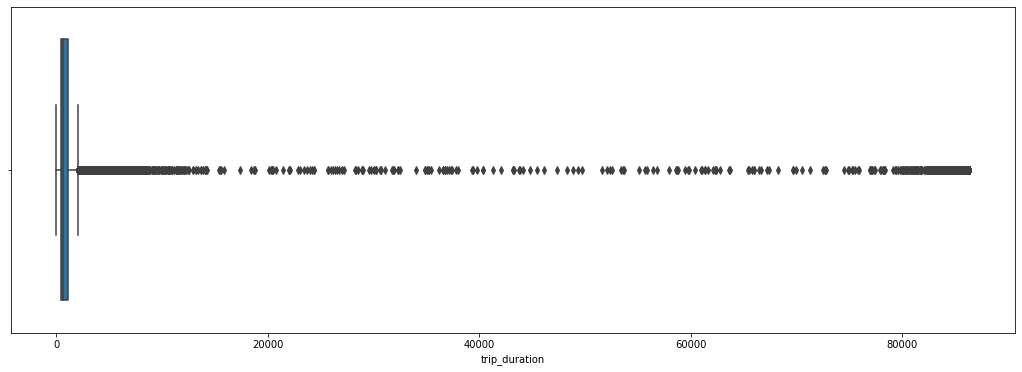

In [23]:
# lets plot again to see has it make any difference
plt.figure(figsize=(18,6))
sns.boxplot(data1['trip_duration'])

D) **Passenger Count**

Text(0.5, 1.0, 'passenger count distribution')

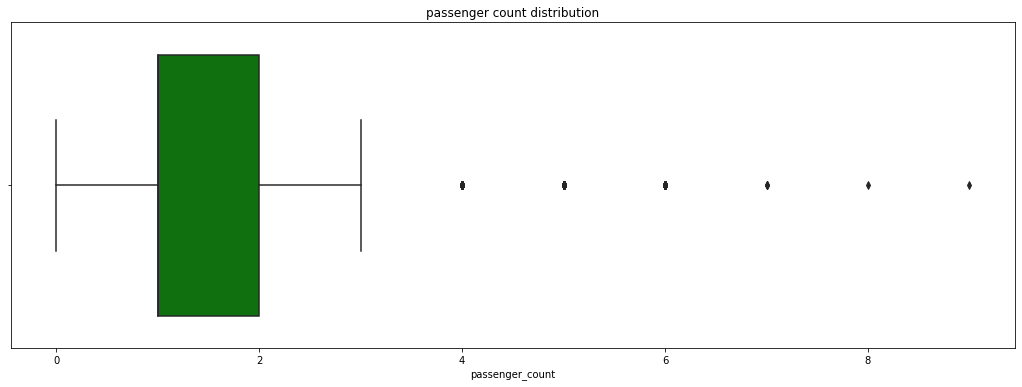

In [24]:
# passenger spread
plt.figure(figsize=(18,6))
sns.boxplot(data1['passenger_count'],color='green')
plt.title('passenger count distribution')

- above plot tells us that most of the trip are done with 1-2 passengers and small vehicles are usually used.
- above 4 passengers trip states that cab used are large vehicles.

In [25]:
data1['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

 - There are some trips with even 0 passenger count.
 - And 3 trips with 7 passengers.
 - And there is only 1 trip each for 8 and 9 passengers.

In [26]:
# lets remove rows with 0 and passengers greater than 6
data1=data1[data1['passenger_count']>0]
data1=data1[data1['passenger_count']<=6]

In [27]:
data1['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

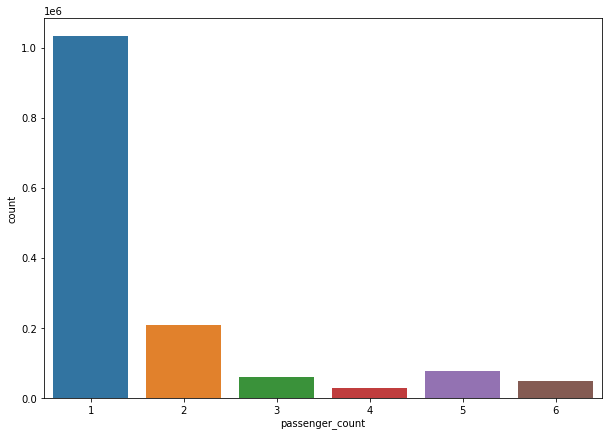

In [28]:
# passenger count
plt.figure(figsize=(10,7))
sns.countplot(data1['passenger_count'])

 - Now, that seems like a fair distribution.

 - We see the highest amount of trips are with 1 passenger.

E) **Distance**

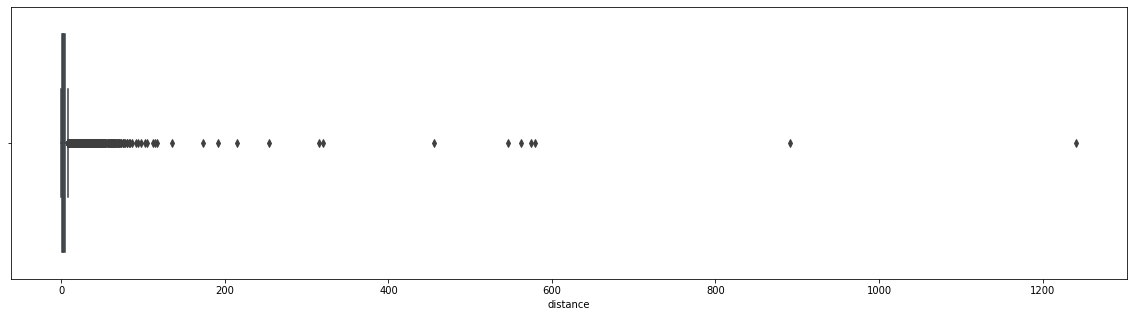

In [29]:
# visulization of distance
plt.figure(figsize = (20,5))
sns.boxplot(data1.distance)
plt.show()

In [30]:
data1.distance[data1.distance==0].count()

5887

- there are 5887 trips with 0 km distnces reasons might be.
- dropoff location couldn't be tracked.
- driver took this trip to complete his ride target number.
- passengers cancelled this trip.

F) **Trip per Day in a Week**

Text(0.5, 1.0, 'Overall week days trips')

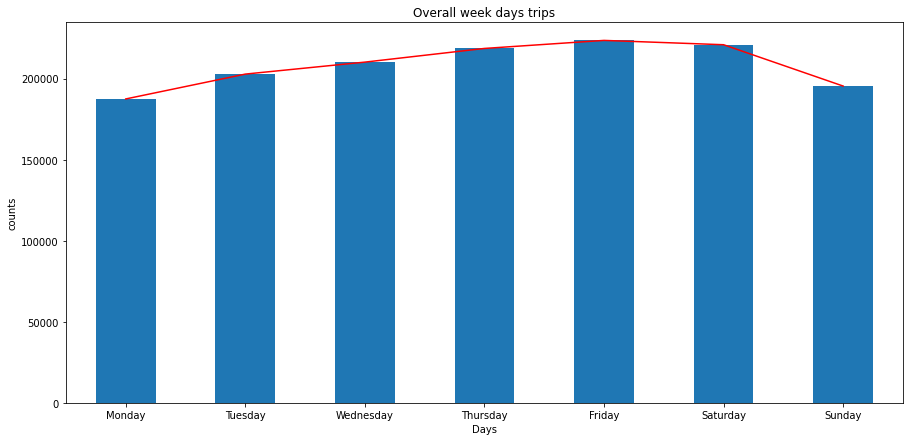

In [31]:
# analysing week days trips
plt.figure(figsize=(15,7))
week=data1['pickup_weekday'].value_counts().sort_index()
week.plot(kind='bar')
week.plot(kind='line',color='red')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Days')
plt.ylabel('counts')
plt.title('Overall week days trips')


- from above observations we can say that New Yorkers prefer friday and saturday to rome around.

G) **Trip per Hour**

Text(0.5, 1.0, 'Hourly Pickups')

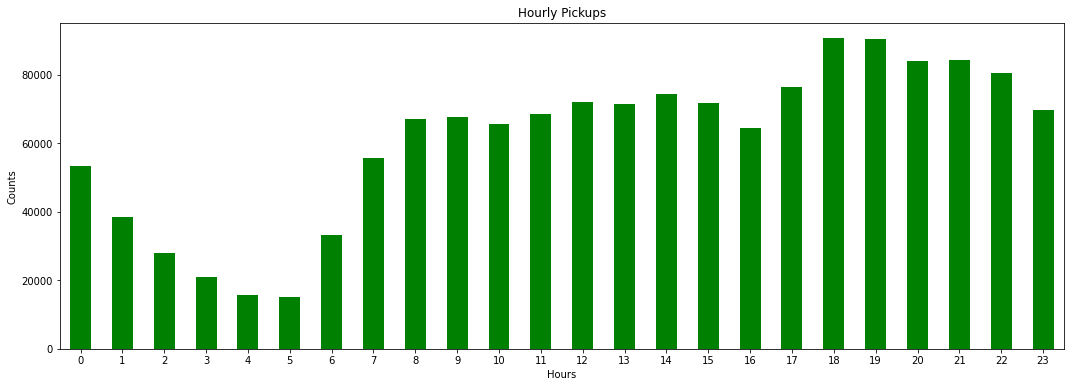

In [32]:
# lets look at hourly pickups
plt.figure(figsize=(18,6))
hour=data1['pickup_hour'].value_counts().sort_index()
hour.plot(kind='bar',color='green')
plt.xticks(rotation=0) # used to change ticks rotations
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.title('Hourly Pickups')

- Above observation suggest -Rush hours (5 pm to 10 pm), probably office leaving time.

- we also observe that most pickups and drops occur in the evening. While the least drops and pickups occur during midday.

H) **Trips Per Day in a Month**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

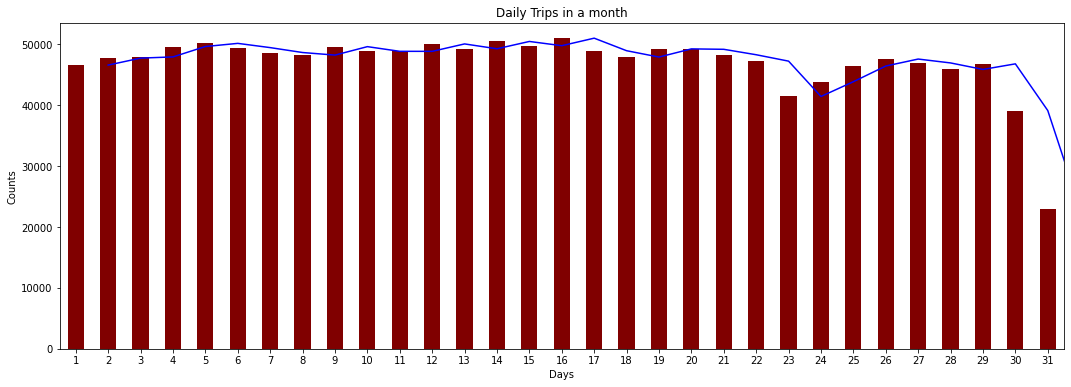

In [33]:
# analysing daily trips in month
plt.figure(figsize=(18,6))
days=data1['pickup_day'].value_counts().sort_index()
days.plot(kind='bar',color='maroon')
days.plot(kind='line',color='blue')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Daily Trips in a month')
plt.xticks(rotation=0)




- New Yorkers don't seems to be fond of travelling during month ends. 

I) **Trips Per Month**

Text(0.5, 1.0, 'Overall Monthly trips')

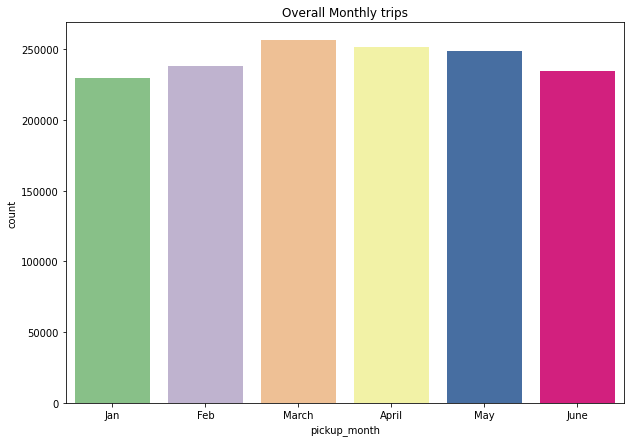

In [34]:
## monthly trips exploration
plt.figure(figsize=(10,7))
sns.countplot(data1['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'])
plt.title('Overall Monthly trips')

- we can see we only got data for 6 months.
- we can see there is some seasonality factor defining demand
  i,e march and april marking highest (summer season) and january being lowest ( extreme snowfall).
  

# Bivariate Analysis of Target variable

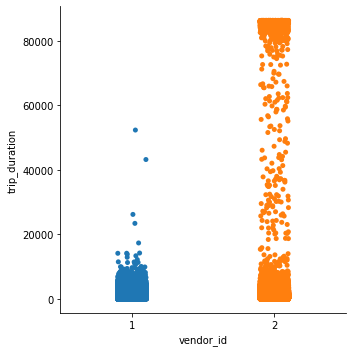

In [35]:
# Trip duration according to vendor
sns.catplot(x='vendor_id',y='trip_duration',data=data1)

Vendor id 2 takes longer trips as compared to vendor 1.

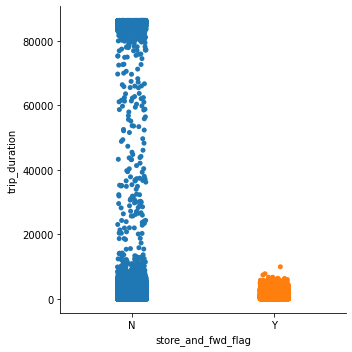

In [36]:
# Trip Duration per Store and Forward Flag
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data1,kind='strip')

- Trip duration is generally longer for trips whose flag was not stored.

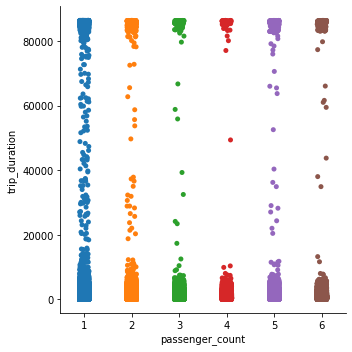

In [37]:
# Trip Duration per hour
sns.catplot(y='trip_duration',x='passenger_count',data=data1,kind='strip')

- There is no visible relation between trip duration and passenger count.


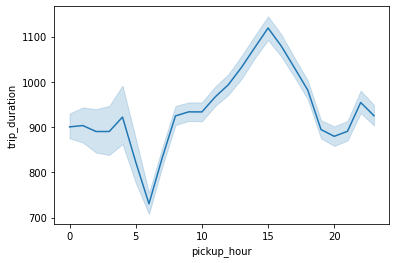

In [38]:
# Trip Duration per time of day
sns.lineplot(x='pickup_hour',y='trip_duration',data=data1)

- We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads. Trip duration is the lowest around 6 am as streets may not be busy.

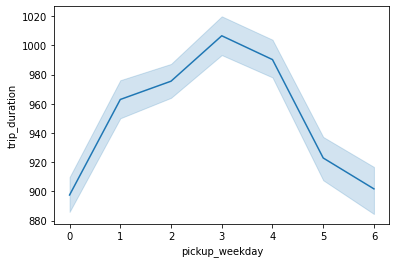

In [39]:
# Trip Duration per Day of Week
sns.lineplot(x='pickup_weekday',y='trip_duration',data=data1)

- Trip duration is the longest on Thursdays closely followed by Fridays.

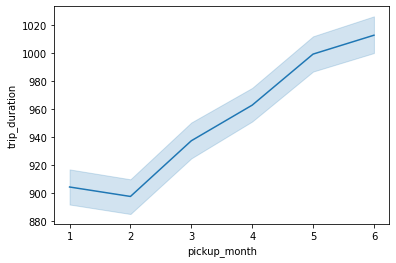

In [40]:
# Trip Duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=data1)

- From February, we can see trip duration rising every month.

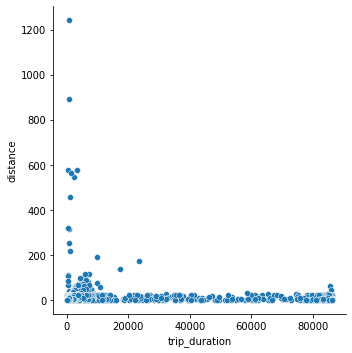

In [41]:
# distance relation with trip duration
sns.relplot(y=data1.distance,x='trip_duration',data=data1)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

Let us see few rows whose distances are 0.

In [42]:
data1[data1['distance']==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_date,pickup_min,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,29,2,0,18,2016-02-29,39,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,10,5,1,18,2016-05-10,7,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,16,5,0,23,2016-05-16,15,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,25,1,0,19,2016-01-25,45,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,27,1,2,22,2016-01-27,29,0.0


We can see even though distance is recorded as 0 but trip duration is definitely more.

- One reason can be that the dropoff coordinates weren’t recorded.
- Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

In [43]:
#categorical values label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data1['store_and_fwd_flag']=encoder.fit_transform(data1['store_and_fwd_flag'])
data1['vendor_id']=encoder.fit_transform(data1['vendor_id'])

- Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded as those are Categorical features , binarizing them will help us to compute them with ease.




# Multivariate Analysis


## Correlation Heatmap

Text(0.5, 1.0, 'correlation plot')

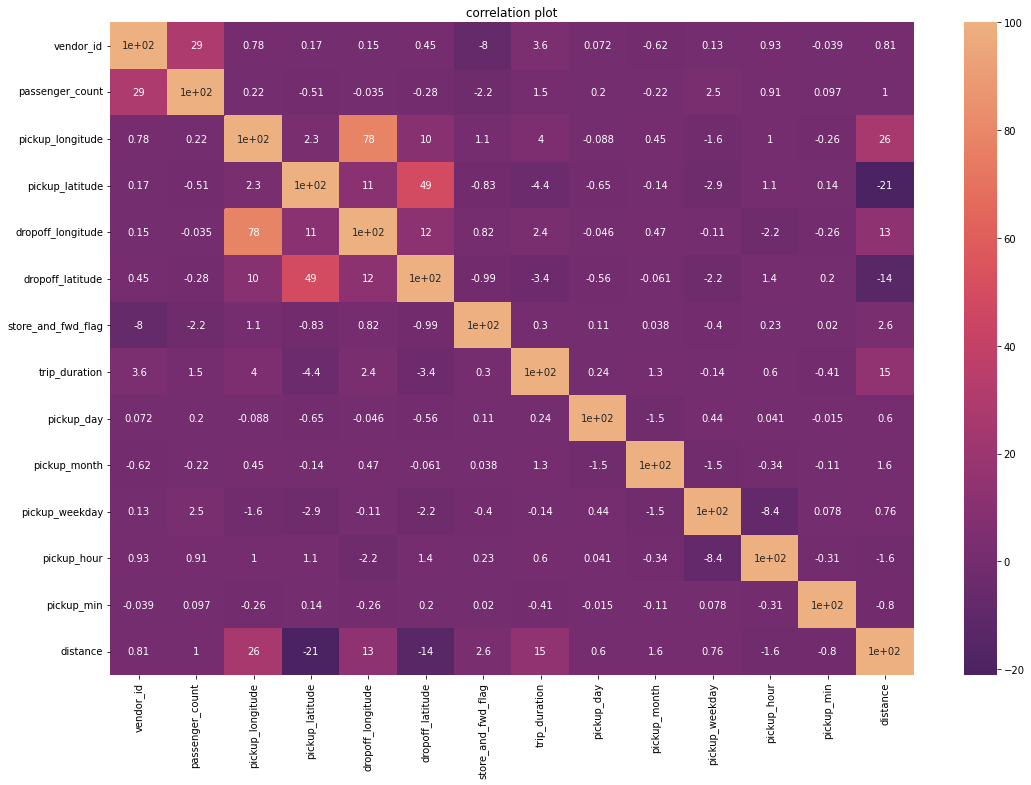

In [44]:
# plotting pearson correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(data1.corr()*100,annot=True,cmap='flare_r')
plt.title('correlation plot')

In [45]:
# dropping some unnecessary columns
nyc_taxi_df = data1.drop(['id','pickup_datetime','pickup_date','dropoff_datetime','distance'], axis=1)

In [46]:
nyc_taxi_df.shape

(1458575, 13)

# Scaling and Normalization

In [47]:
#Predictors and Target Variable

X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration']) 

In [48]:
# scaling predictors and creating new dataframe
from sklearn.preprocessing import StandardScaler
cols = X.columns
print(cols)


Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day', 'pickup_month', 'pickup_weekday', 'pickup_hour',
       'pickup_min'],
      dtype='object')


In [49]:
scaler = StandardScaler() # creating instance for scaler

In [50]:
df = scaler.fit_transform(X)

In [52]:
df = pd.DataFrame(df, columns=cols)
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_min
0,0.932376,-0.505698,-0.122246,0.517488,0.124378,0.384565,-0.074459,-0.172829,-0.307453,-1.561057,0.530258,-0.322670
1,-1.072528,-0.505698,-0.097712,-0.375858,-0.368965,-0.575340,-0.074459,-0.402632,1.477163,1.509521,-2.126171,0.774026
2,0.932376,-0.505698,-0.078128,0.395900,-0.451801,-1.162274,-0.074459,0.401676,-1.497197,-1.049294,-0.407305,0.312259
3,0.932376,-0.505698,-0.515547,-0.941334,-0.549973,-1.256128,-0.074459,-1.092039,0.287419,-0.537531,0.842779,0.139097
4,0.932376,-0.505698,0.006128,1.286113,0.006982,0.855961,-0.074459,1.205984,-0.307453,0.997758,-0.094784,0.023655


Normalizing the Dataset using Standard Scaling Technique.


Now, Why Standard Scaling ? Why not MinMax or Normalizer ?


- It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and machine learning algorithms like KNN.


- While, Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN.

# The First Approach - Decomposition using Principal Component Analysis (PCA)

- we have to pass our Scaled Dataframe in PCA model and observe the elbow plot to get better idea of explained variance.


- We'll also go through a approach without using PCA in Second Part and Later compare results with PCA approach.

In [53]:
X = df

In [54]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.15610889, 0.11780171, 0.10883909, 0.09024597, 0.08463497,
       0.08332704, 0.08233827, 0.08208971, 0.07605669, 0.05879453,
       0.0423439 , 0.01741923])

<BarContainer object of 12 artists>

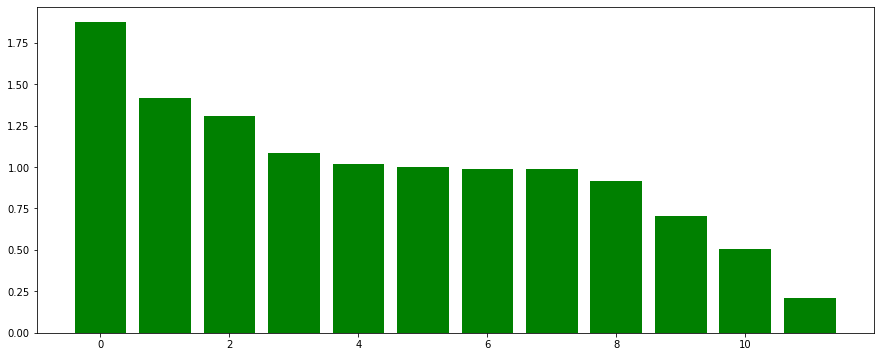

In [55]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="green")

- At 11th component our PCA model seems to go Flat without explaining much of a Variance.

Text(0.5, 1.0, 'Elbow Plot')

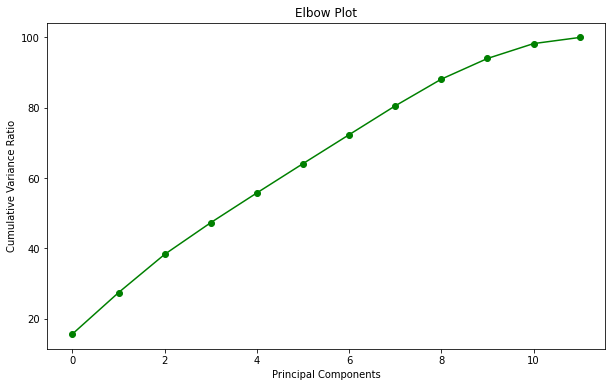

In [56]:
#Cumulative Variance Ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

In [57]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([1.87330795, 1.41362143, 1.30607002, 1.08295242, 1.01562033,
       0.99992515, 0.98805988, 0.98507723, 0.91268087, 0.70553486,
       0.50812719, 0.20903088])

- Above , we had considered 12 as a required number of components and extracted new features by transforming the Data.

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

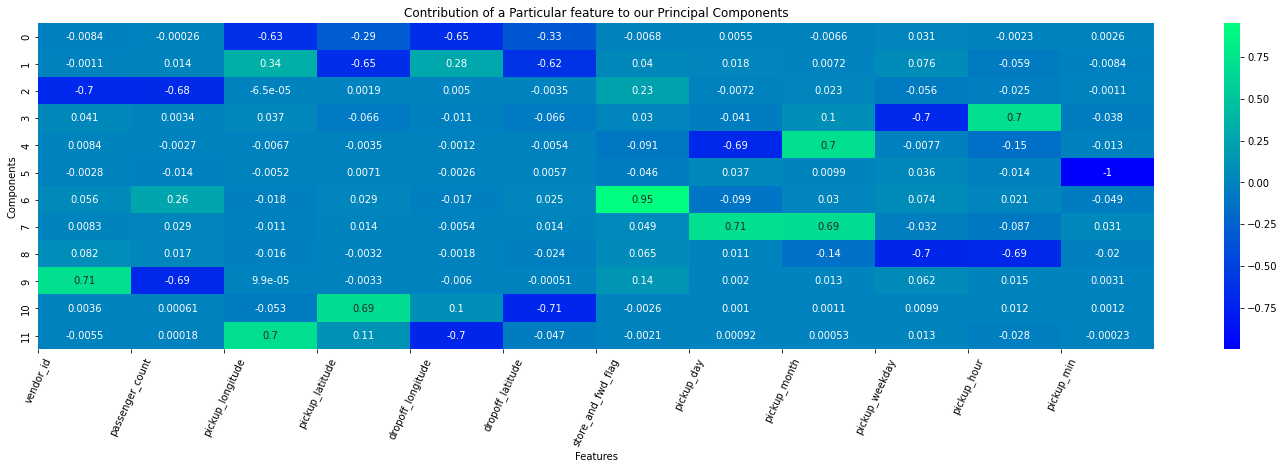

In [58]:
#importance of features in Particular Principal Component

plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

- Above plot gives us detailed idealogy of which feature has contributed more or less to our each Principal Component.


- Pricipal Components are our new features which consists of Information from every other original Feature we have. 


- We reduce the Dimensions using PCA by retaining as much as Information possible. 

# Splitting dataset and applying Algorithms

- Let’s pass the PCA Transformed data in our Machine Learning Regression Algorithms. To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (30%).


**So, I want to approach from base model built using basic Linear Regression and then bring in more Sophisticated Algorithms - Decision Tree & Random Forest. It will give us good idea how Linear Regression performs against Decision Tree Regressor and Random Forest Regressor. Later, we will also approach with same algorithms on "without PCA" data. Finally, we'll evaluate both approaches we took and lay down recommended approach and algorithms.**

In [59]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(nyc_taxi_df['trip_duration']).values

In [60]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021002, 12), (437573, 12), (1021002,), (437573,))

### Linear regression:

- Simple to explain.


- Model training and prediction are fast.


- No tuning is required except regularization.

In [61]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.55426757, 6.61017829, 6.3456758 , ..., 6.56312316, 6.37585418,
       6.40891258])

In [62]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.464386017053747,
 array([-0.00523293,  0.11256565, -0.01430477,  0.05320403,  0.01515508,
         0.00389792,  0.00918405,  0.02759952, -0.0069915 ,  0.00257607,
        -0.01439774,  0.06072826]))

Interpreting the coefficients:

Here we can see Increase and decrease order at each principal component in trip duration.


In [63]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.040165471062659885
Validation Score :  0.05170674946102516
Cross Validation Score :  0.03426854329575659
R2_Score :  -32.90442430909449


Text(0.5, 1.0, 'Test VS Prediction')

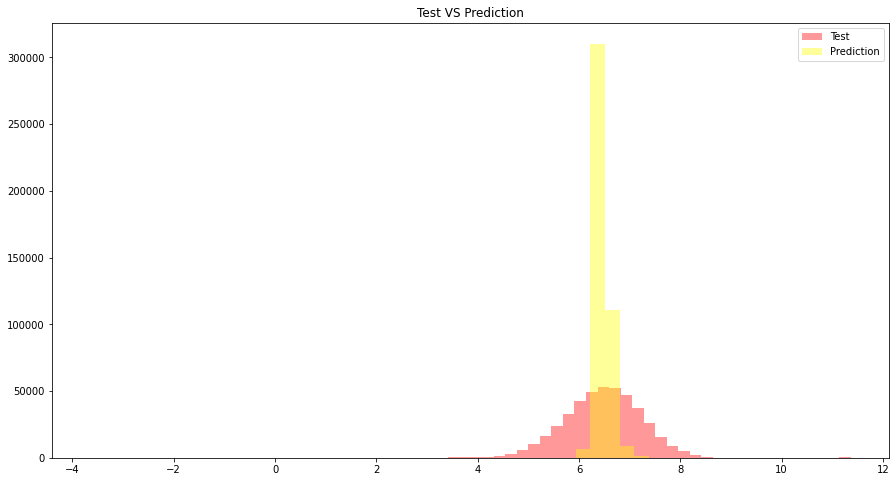

In [67]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="red", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="yellow", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in red) and Predicted values (in yellow) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

### Decision Tree:

- Decision trees are very intuitive and easy to explain.


- They follow the same pattern of thinking that humans use when making decisions.


- Decision trees are a common-sense technique to find the best solutions to problems with uncertainty.

In [86]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=11)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.87758563, 8.11452655, 6.08914453, ..., 5.53867246, 6.49072353,
       6.08137091])

In [85]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.5629380593387727
Validation Score :  0.5574412800767105
Cross Validation Score :  0.5594185757352087
R2_Score :  0.20980875565234292
RMSLE :  0.08060812176183994


- Our Goal is to reduce the value of loss function (RMSLE) as much as possible.

Text(0.5, 1.0, 'Test VS Prediction')

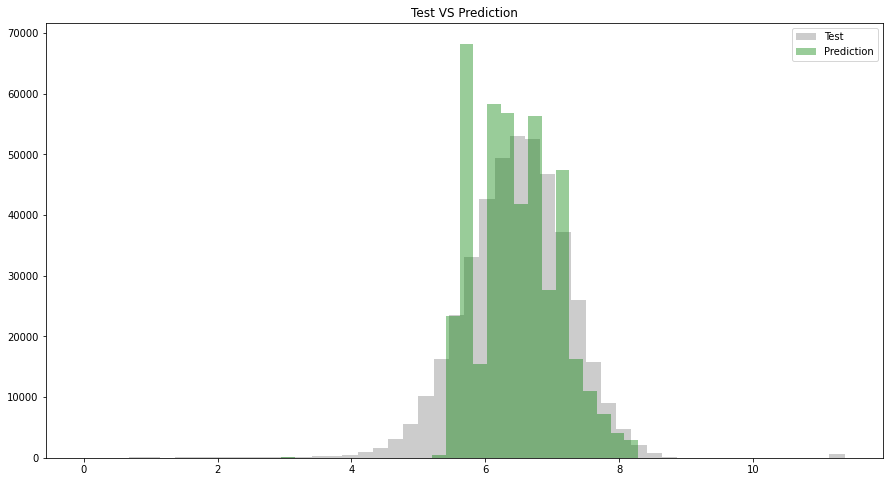

In [70]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="grey", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="green", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

- From the above Viz. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Grey) and Predicted values (in Green) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.